In [ ]:
# v1.01

# Further experiments with preprocessing images

In [32]:
# 1. Import libraries
import cv2
import matplotlib.pyplot as plt
import sys
sys.path.append("..")  # Adds higher directory to python modules path.

import modules.importfile as imp
import modules.ocr as ocr
import torch
import easyocr
import re
import os
import shutil
import numpy as np

..\data\main-dataset\20210818_202919.jpg


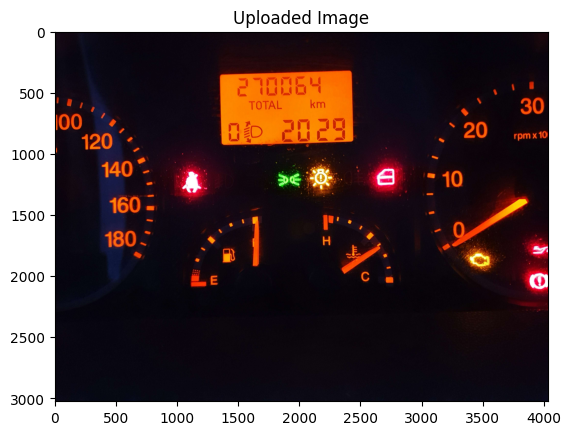

In [33]:
# 2. Read file - import file pop-up opens in the background - press alt+tab to switch to it
# Output is a relative path to the image
img_path = imp.browse_files()
print(img_path) # Relative path to the image
img = plt.imread(img_path) # Read the image
plt.imshow(img) # Show the image
plt.title("Uploaded Image")
plt.show()

In [18]:
# 3. Basic OCR Function - initial test
def mileage_ocr(image_path):
    """
    Performs Optical Character Recognition (OCR) on an image to extract 6-digit numbers, typically representing mileage.

    The function uses the EasyOCR library to read text from the image. It then uses regular expressions to find all 6-digit numbers in the text.
    If no 6-digit numbers are found, the function returns the string "unreadable".

    Args:
        img (str or PIL.Image.Image): The image to perform OCR on. This can be a string representing the path to the image, or a PIL Image object.

    Returns:
        list or str: A list of strings representing the 6-digit numbers found in the image. If no 6-digit numbers are found, returns the string "unreadable".
    """
    # Create a reader to perform OCR
    reader = easyocr.Reader(['en'], gpu=True)
    
    # Read all text from image
    result = reader.readtext(image_path, allowlist ='0123456789')

    # Find all 6-digit numbers
    six_digit_numbers = re.findall(r'\b\d{6}\b', str(result))

    # If no 6-digit number found, return "unreadable" and add file to unreadable_files
    if not six_digit_numbers:
        return ("unreadable")
    return (six_digit_numbers)
# Extracted mileage
print(mileage_ocr(img_path))

['274963']


In [19]:
# 4. Move unreadable files to 'unreadable_files' subfolder
# Read mileage from image - 6-digit numbers
unreadable_files = []
mileage = mileage_ocr(img)
if mileage == "unreadable":
    unreadable_files.append(img_path)
# Extracted mileage
print(mileage)

['274963']


Initial unreadable file sorting tool - currently obsolete

In [ ]:
# # If mileage is unreadable, save image to 'unreadable_files' folder
# # Set a directory to store unreadable files

# directory = 'data/training-dataset/unreadable_files' 
# # Create the directory if it doesn't exist
# if not os.path.exists(directory):
#     os.makedirs(directory)

# # Move the file to the directory
# for file in unreadable_files:
#     filename = os.path.basename(img_path)  # Get the filename from the path
#     shutil.move(img_path, f'{directory}/{filename}')

# <center>Test environment - use imported file from step 1

OCR detection outlining

In [ ]:
# Outlined Textboxes detected by OCR
def display_image_with_text(image_path):  # Function definition
    reader = easyocr.Reader(['en'], gpu = True)  # Creating an OCR reader for English language
    image = cv2.imread(image_path)  # Loading the image
    result = reader.readtext(image, allowlist ='0123456789')  # Recognizing text on the image

    fig, ax = plt.subplots(figsize=(10, 10))  # Creating a plot
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converting the image from BGR to RGB format
    plt.imshow(image)  # Displaying the image

    for (bbox, text, prob) in result:  # Iterating through the text recognition results
        (tl, tr, br, bl) = bbox  # Breaking down the bounding box into four points
        tl = (int(tl[0]), int(tl[1]))  # Converting coordinates to integers
        tr = (int(tr[0]), int(tr[1]))
        br = (int(br[0]), int(br[1]))
        bl = (int(bl[0]), int(bl[1]))
        cv2.rectangle(image, tl, br, (0, 255, 0), 2)  # Drawing a rectangle around the text
        cv2.putText(image, text, tl, cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)  # Adding text to the image

    # Finding only 6-digit numbers
    six_digit_numbers = re.findall(r'\b\d{6}\b', str(result))

    # If no 6-digit number is found, return "unreadable" and add the file to unreadable_files
    if not six_digit_numbers:
        print ("unreadable")
    plt.imshow(image)  # Displaying the image
    plt.show()  # Displaying the plot
    return(six_digit_numbers)  # Returning 6-digit numbers

print(display_image_with_text(img_path))  # Calling the function and printing the result

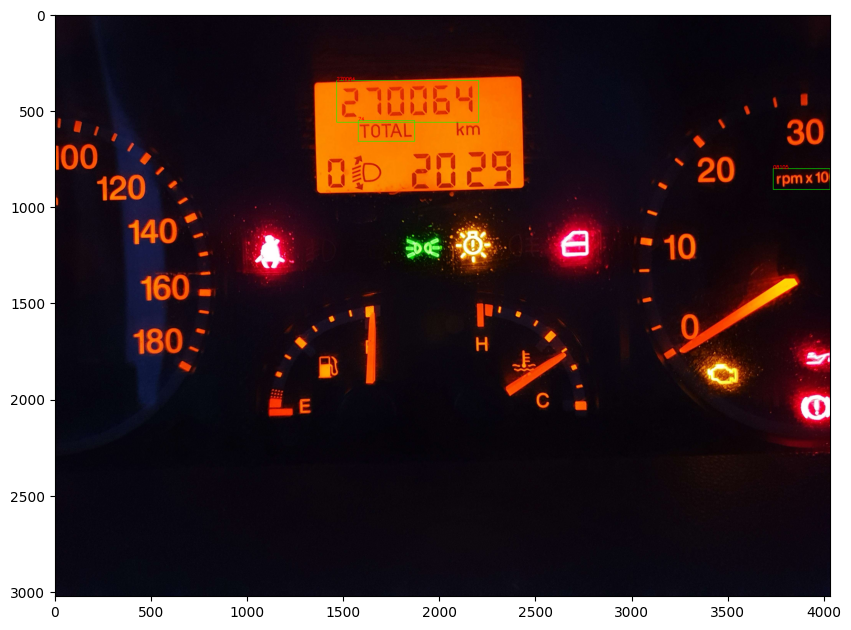

['270064']

In [34]:
# Outlined Textboxes OCR - 2x wider than tall
import matplotlib.pyplot as plt  
import cv2  
import easyocr 

def display_image_with_text(image_path):  
    reader = easyocr.Reader(['en']) 
    image = cv2.imread(image_path)  
    result = reader.readtext(image, allowlist ='0123456789', text_threshold=0.01, mag_ratio=3)  

    fig, ax = plt.subplots(figsize=(10, 10))  
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # cv2.imread() returns an image in BGR format, so we need to convert it to RGB
    plt.imshow(image)  

    for (bbox, text, prob) in result:  # Iterate through the text recognition results
        (tl, tr, br, bl) = bbox  # Break down the bounding box into four points
        tl = (int(tl[0]), int(tl[1]))  # Convert coordinates to integers
        tr = (int(tr[0]), int(tr[1])) 
        br = (int(br[0]), int(br[1]))
        bl = (int(bl[0]), int(bl[1]))
        
        width = abs(br[0] - bl[0])  # Calculate the width of the bounding box
        height = abs(tr[1] - br[1])  # Calculate the height of the bounding box
        
        # Check if the width of the bounding box is 2x greater than the height
        if width > 2 * height:
            cv2.rectangle(image, tl, br, (0, 255, 0), 2)  # Draw a rectangle around the text
            cv2.putText(image, text, tl, cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)  # Add text to the image

    # Find only 6-digit numbers
    six_digit_numbers = re.findall(r'\b\d{6}\b', str(result))

    # If no 6-digit number is found, return "unreadable"
    if not six_digit_numbers:
        print ("unreadable")
    plt.imshow(image)  
    plt.show()  
    return(six_digit_numbers) 

display_image_with_text(img_path)

# <center>OCR attempts testing various parameters

### Preprocessing + OCR attempt #1

unreadable


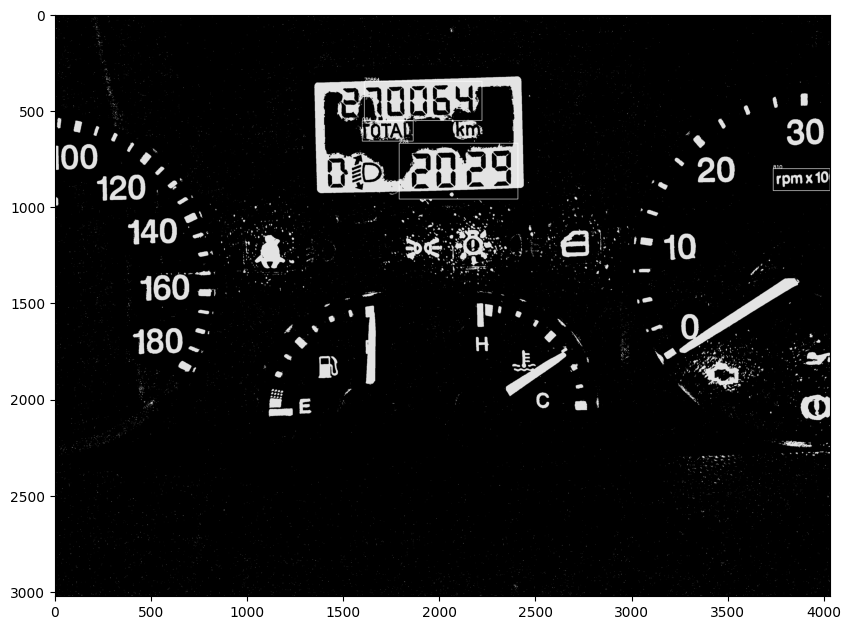

[]

In [35]:
# OCR+Outline - Testing various binarization methods
def display_image_with_text(img_path):  # Define function
    reader = easyocr.Reader(['en'])  # Create OCR reader
    image = cv2.imread(img_path)  # Read image
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert colors from BGR to RGB
    
    # Convert to grayscale
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Binary thresholding
    #_, binary_img = cv2.threshold(gray_img, 128, 255, cv2.THRESH_TOZERO | cv2.THRESH_TRIANGLE)
    # Adaptive binarization variant
    adaptive_img = cv2.adaptiveThreshold(gray_img, 228, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 201, -7)
    # Denoising grayscale image
    denoised_img = cv2.fastNlMeansDenoising(adaptive_img, None, h=7, templateWindowSize=7, searchWindowSize=1)
    
    #Run OCR on denoised image
    result = reader.readtext(denoised_img, allowlist ='0123456789', text_threshold=0.5)

    fig, ax = plt.subplots(figsize=(10, 10))  # Create plot

    for (bbox, text, prob) in result:  # Iterating through the text recognition results
        (tl, tr, br, bl) = bbox  # Breaking down the bounding box into four points
        tl = (int(tl[0]), int(tl[1]))  # Converting coordinates to integers
        tr = (int(tr[0]), int(tr[1])) 
        br = (int(br[0]), int(br[1]))
        bl = (int(bl[0]), int(bl[1]))
        
        width = abs(br[0] - bl[0])  # Calculating the width of the bounding box
        height = abs(tr[1] - br[1])  # Calculating the height of the bounding box
        
        # Checking if the width of the bounding box is 2x greater than the height
        if width > 2 * height:
            cv2.rectangle(denoised_img, tl, br, (255, 255, 255), 2)  # Drawing a rectangle around the text
            cv2.putText(denoised_img, text, tl, cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)  # Adding text to the image

    # Finding only 6-digit numbers
    six_digit_numbers = re.findall(r'\b\d{6}\b', str(result))

    # If no 6-digit number is found, return "unreadable"
    if not six_digit_numbers:
        print ("unreadable")
    plt.imshow(denoised_img, cmap='gray')  # Display denoised image
    plt.show()
    return(six_digit_numbers)  # Returning 6-digit numbers

display_image_with_text(img_path)

### Testing erosion on binarized images - Preprocessing + OCR attempt #2

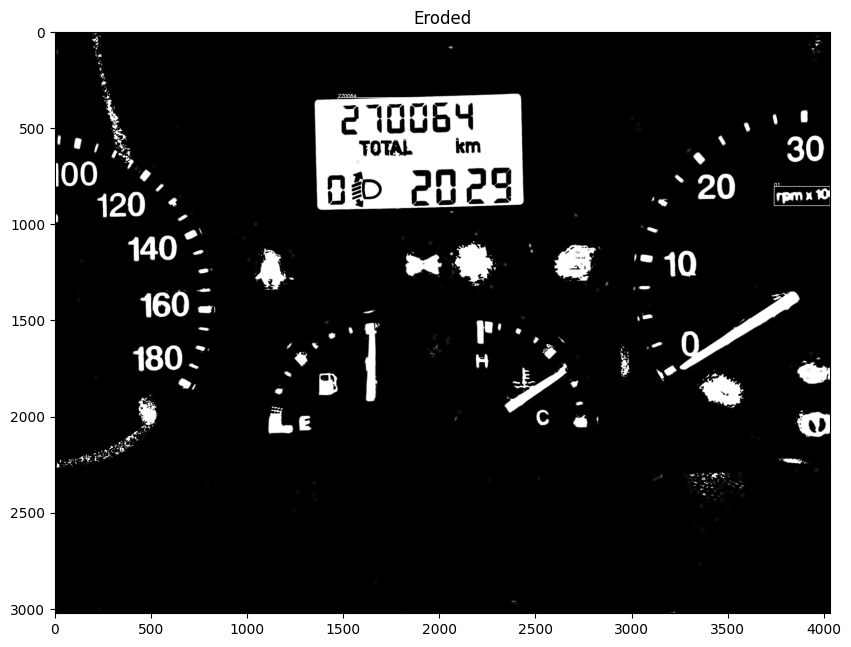

['270064']

In [36]:
# TEST OCR+Outline - 2x width + PREPROCESSING
def display_image_with_text(img_path):  # Function definition
    reader = easyocr.Reader(['en'])  # Creating an OCR reader for English language
    image = cv2.imread(img_path)  # Loading the image
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converting the image from BGR to RGB format
    # Convert to grayscale
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply binary thresholding to improve contrast - 2 variants
    #_, binary_img = cv2.threshold(gray_img, 128, 255, cv2.THRESH_TOZERO | cv2.THRESH_TRIANGLE)
    adaptive_img = cv2.adaptiveThreshold(gray_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,631, -2)
    
    kernel = np.ones((3,3),np.uint8)
    eroded_img = cv2.erode(adaptive_img, kernel, iterations=2)
    # Denoising eroded image
    denoised_img = cv2.fastNlMeansDenoising(eroded_img, h=35, templateWindowSize=47)

    #Run OCR
    result = reader.readtext(denoised_img, allowlist ='0123456789', text_threshold=0.1)  # Recognizing text in the image

    fig, ax = plt.subplots(figsize=(10, 10))  # Creating a plot
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converting the image from BGR to RGB format
  
    for (bbox, text, prob) in result:  # Iterating through the text recognition results
        (tl, tr, br, bl) = bbox  # Breaking down the bounding box into four points
        tl = (int(tl[0]), int(tl[1]))  # Converting coordinates to integers
        tr = (int(tr[0]), int(tr[1])) 
        br = (int(br[0]), int(br[1]))
        bl = (int(bl[0]), int(bl[1]))
        
        width = abs(br[0] - bl[0])  # Calculating the width of the bounding box
        height = abs(tr[1] - br[1])  # Calculating the height of the bounding box
        
        # Checking if the width of the bounding box is 2.5x greater than the height
        if width > 2.5 * height:
            cv2.rectangle(denoised_img, tl, br, (255, 255, 0), 2)  # Drawing a rectangle around the text
            cv2.putText(denoised_img, text, tl, cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 0), 2)  # Adding text to the image

    # Finding all 6-digit numbers
    six_digit_numbers = re.findall(r'\b\d{6}\b', str(result))

    # If no 6-digit number is found, return "unreadable"
    if not six_digit_numbers:
        print ("unreadable")
    
    plt.imshow(denoised_img, cmap='gray')  # Displaying the image
    plt.title("Eroded")
    plt.show()  # Displaying the plot
    
    return(six_digit_numbers)  # Returning 6-digit numbers

display_image_with_text(img_path)  # Calling the function

## EDGE DETECTION TEST

In [25]:
# # 1. Load the image as img
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# import ocr as ocr
# import importfile as imp
# # Import the image
# file = imp.browse_files()
# # Load the image
# img = cv2.imread(file)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

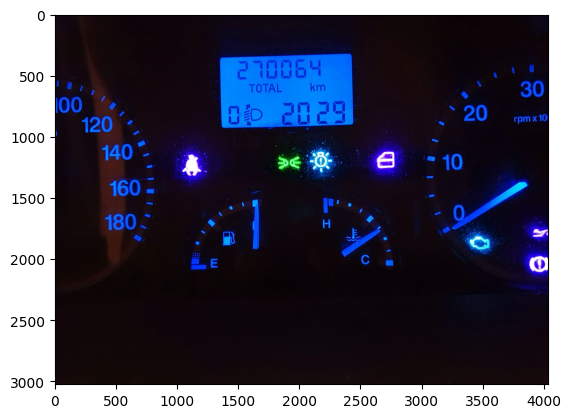

In [38]:
# Show image
plt.imshow(cv2.imread(img_path), cmap='gray')

OCR result:
[270064]
OCR result after edge detection:
Original image:


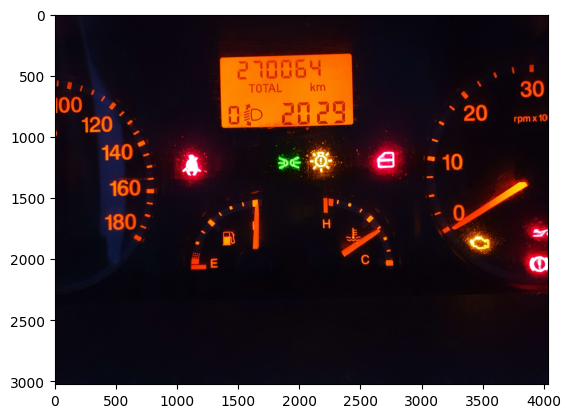

Sharpened image:


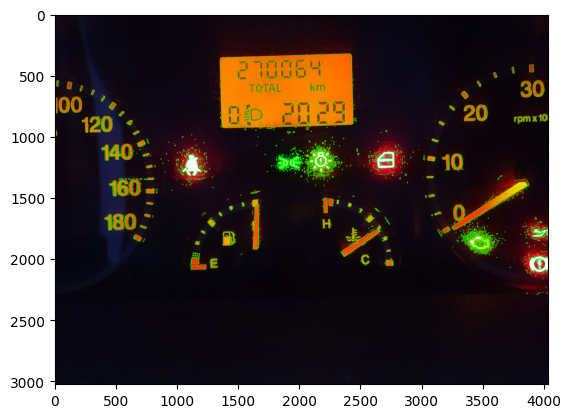

None


In [40]:
# 2. ORDER: 1. GAMMA CORRECTION, 2. EROSION, 3. EDGE DETECTION 4. SHARPENING
def unsharp_mask(image, sigma=16.0, strength=4.5):
    # Gaussian blur
    blurred = cv2.GaussianBlur(image, (1, 1), sigma)
    # Enhance the image by adding a weighted difference between the original image and the blurred one
    sharpened = cv2.addWeighted(image, 1.0 + strength, blurred, -strength, 0) 
    return sharpened

def adjust_gamma(image, gamma=1.2):
    # Build a lookup table mapping each grayscale level to its gamma-corrected equivalent
    invGamma = 5 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")

    # Apply the gamma correction mapping to the input image
    return cv2.LUT(image, table)

def edge_detection(image):
    # Apply Gaussian blur to reduce noise
    img_blur = cv2.GaussianBlur(img, (29, 29), 1)

    # Apply Canny edge detection
    edges = cv2.Canny(img_blur, 50, 90)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image
    img_with_contours = cv2.drawContours(img.copy(), contours, -3, (0,255,0), 2)

    # Display the image with contours using matplotlib
    #plt.imshow(img_with_contours, cmap='gray')
    #plt.show()
    return img_with_contours
def preprocess(img):
    """
    Test variant of preprocessing function.

    Preprocesses an image for further analysis.

    The function reads an image from the file path provided, checks if the image is loaded properly, and resizes the image to a maximum dimension of 1080 pixels, maintaining the aspect ratio.

    Args:
        file (str): The file path to the image to be preprocessed.

    Returns:
        numpy.ndarray or None: The preprocessed image as a numpy array if the image is loaded properly, or None if the image cannot be read.
    """
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gamma_corrected_img = adjust_gamma(img, gamma=1.2)  # Możesz dostosować wartość gamma w zależności od Twojego obrazu
    kernel = np.ones((3,3),np.uint8)
    eroded_img = cv2.erode(gamma_corrected_img, kernel, iterations=4)
    edge_img = edge_detection(eroded_img)
    sharpened_img = unsharp_mask(edge_img)
    
    print("Original image:")
    plt.imshow(img, cmap='gray')
    plt.show()
    #print("Gamma corrected image:")
    #plt.imshow(gamma_corrected_img, cmap='gray')
    #plt.show()
    #print("Eroded image:")
    #plt.imshow(eroded_img, cmap='gray')
    #plt.show()
    #print("Edge detected image:")
    #plt.imshow(edge_img, cmap='gray')
    #plt.show()
    print("Sharpened image:")
    plt.imshow(sharpened_img, cmap='gray')
    plt.show()
    
    return sharpened_img
print("OCR result:")
print(ocr.mileage_ocr(cv2.imread(img_path)))
#preprocess(cv2.imread(file))
print("OCR result after edge detection:")
print(ocr.mileage_ocr(preprocess(cv2.imread(img_path))))